In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import itertools
import time
import numpy as np
from matplotlib import pyplot


In [2]:
df = pd.read_csv('../classwork/Kickstarter_Campaigns/data/latest_data.csv',index_col='Unnamed: 0')
df.head()

/Users/laurentvanhassel/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,backers_count,category,country_displayable_name,created_at,deadline,goal,launched_at,pledged,staff_pick,state,...,sub_category,blurb_length,launch_to_deadline,creation_to_launch,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,3,food,the United States,2014-08-30 01:10:21,2014-10-02 15:44:07,400.0,2014-09-02 15:44:07,15.0,False,failed,...,small batch,28.0,30,3,Tuesday,Thursday,September,October,2pm-4pm,2pm-4pm
1,6,technology,the United Kingdom,2015-02-18 17:15:56,2015-03-20 20:59:26,200.0,2015-02-18 21:59:26,28.0,False,failed,...,software,22.0,29,0,Wednesday,Friday,February,March,8pm-10pm,8pm-10pm
2,90,photography,the United States,2018-07-28 02:07:21,2018-08-27 13:18:38,2500.0,2018-07-28 13:18:38,4350.0,False,successful,...,photobooks,18.0,30,0,Saturday,Monday,July,August,12pm-2pm,12pm-2pm
3,205,photography,the United Kingdom,2018-02-10 14:42:07,2018-04-05 06:42:32,9500.0,2018-03-06 07:42:32,10181.0,False,successful,...,photobooks,19.0,29,23,Tuesday,Thursday,March,April,6am-8am,6am-8am
4,35,art,the United States,2012-07-25 23:21:04,2012-09-11 03:59:00,4000.0,2012-08-27 20:40:13,4254.0,False,successful,...,public art,25.0,14,32,Monday,Tuesday,August,September,8pm-10pm,2am-4am


In [3]:
df = df.drop(columns=['created_at', 'deadline','launched_at','backers_count','pledged','usd_pledged','staff_pick','sub_category','creation_to_launch','launch_day','deadline_day','launch_month','deadline_month','launch_time','deadline_time','launch_to_deadline','category','country_displayable_name'])
# df = df.drop(columns=['created_at', 'deadline','launched_at','backers_count','pledged','usd_pledged','sub_category'])

In [4]:
df.state.count()

2359293

In [5]:
df = df[df.goal >= 1000]

In [6]:
#df = df.sample(frac=0.7)
df = df.sample(n=250000)

In [7]:
df.describe()

,goal,blurb_length
count,2.500000e+05,250000.000000
mean,5.674077e+04,18.462776
std,1.266311e+06,5.235342
min,1.000000e+03,0.000000
25%,3.000000e+03,16.000000
50%,6.270000e+03,20.000000
75%,1.800000e+04,22.000000
max,1.000000e+08,35.000000


In [8]:
df.state.count()

250000

In [9]:
df['state'].value_counts()

successful    147813
failed        102187
Name: state, dtype: int64

In [10]:
df

,goal,state,blurb_length
Unnamed: 0,,,
2480407,3500.0,successful,16.0
2267745,5300.0,failed,24.0
1694985,65000.0,failed,5.0
1296486,1500.0,successful,20.0
1724065,5000.0,successful,18.0
...,...,...,...
979611,6800.0,successful,21.0
103485,3500.0,successful,15.0
1375565,2350.0,successful,24.0


In [11]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

In [12]:
# cate_counts = df.launch_time.value_counts()
# cate_counts

In [13]:
df.dtypes

goal            float64
state            object
blurb_length    float64
dtype: object

In [14]:
# need to convert bool to str
# df['staff_pick'] = df['staff_pick'].astype(str)
# df

In [15]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

In [16]:
# Generate our categorical variable list
df_object = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_object].nunique()
# we can see that NAME, APPLICATION_TYPE, CLASSIFICATION will all be issues



Series([], dtype: float64)

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_object]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_object)
encode_df.head()

""
0
1
2
3
4


In [18]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_object,1)
df.head()

,goal,state,blurb_length
141967,1500.0,1,11.0
212874,6500.0,0,13.0
164730,8000.0,1,15.0
175347,2500.0,1,20.0
234977,40000.0,0,21.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = df["state"].values
X = df.drop(["state"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
len(X_train_scaled[0])

2

In [22]:
# Define the model - deep neural net
#inputs = 40
#layer one = 80 (2x inputs)
#layer two = 12
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features*2
hidden_nodes_layer2 = number_input_features*2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
575/575 [==============================] - 0s 540us/step - loss: 0.6894 - accuracy: 0.5895
Epoch 2/50
575/575 [==============================] - 0s 544us/step - loss: 0.6762 - accuracy: 0.5916
Epoch 3/50
575/575 [==============================] - 0s 517us/step - loss: 0.6690 - accuracy: 0.6012
Epoch 4/50
575/575 [==============================] - 0s 514us/step - loss: 0.6642 - accuracy: 0.6112
Epoch 5/50
575/575 [==============================] - 0s 503us/step - loss: 0.6608 - accuracy: 0.6168
Epoch 6/50
575/575 [==============================] - 0s 513us/step - loss: 0.6579 - accuracy: 0.6216
Epoch 7/50
575/575 [==============================] - 0s 503us/step - loss: 0.6555 - accuracy: 0.6240
Epoch 8/50
575/575 [==============================] - 0s 501us/step - loss: 0.6540 - accuracy: 0.6261
Epoch 9/50
575/575 [==============================] - 0s 511us/step - loss: 0.6526 - accuracy: 0.6282
Epoch 10/50
575/575 [==============================] - 0s 501us/step - loss: 0.651

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

192/192 - 0s - loss: 0.6495 - accuracy: 0.6317
Loss: 0.6494503021240234, Accuracy: 0.6317077279090881


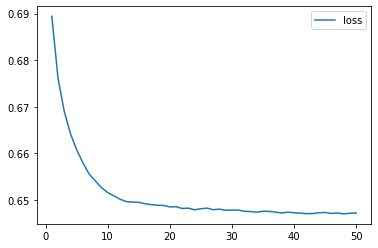

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

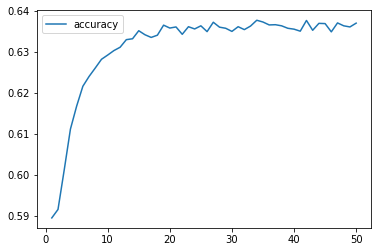

In [25]:
# Plot the loss
history_df.plot(y="accuracy")

In [26]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.619


In [27]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, random_state=78, max_features="auto", min_samples_leaf=50)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.630


Feature: 0, Score: 0.84754
Feature: 1, Score: 0.15246


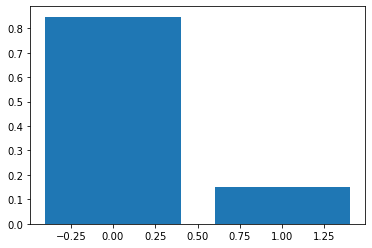

In [28]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
import pickle
pickle.dump(rf_model, open("model.pkl","wb"))

In [37]:
model = pickle.load(open("model.pkl","rb"))